In [7]:
import matplotlib.pyplot as plt
import matplotlib

# 1Ô∏è‚É£ ÌïúÍ∏Ä Í∞ÄÎä• Ìè∞Ìä∏ ÏÑ§Ï†ï (macOS Í∏∞Î≥∏ ÏòàÏãú)
matplotlib.rcParams['font.family'] = 'AppleGothic'

# 2Ô∏è‚É£ Í∑∏ÎûòÌîÑÏóêÏÑú ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
matplotlib.rcParams['axes.unicode_minus'] = False


‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å

[Í≤∞Ï∏°Ïπò ÌôïÏù∏]
                               orders items products translation
customer_id                       0.0     -        -           -
freight_value                       -   0.0        -           -
order_approved_at               160.0     -        -           -
order_delivered_carrier_date   1783.0     -        -           -
order_delivered_customer_date  2965.0     -        -           -
order_estimated_delivery_date     0.0     -        -           -
order_id                          0.0   0.0        -           -
order_item_id                       -   0.0        -           -
order_purchase_timestamp          0.0     -        -           -
order_status                      0.0     -        -           -
price                               -   0.0        -           -
product_category_name               -     -    610.0         0.0
product_category_name_english       -     -        -         0.0
product_description_lenght          -     

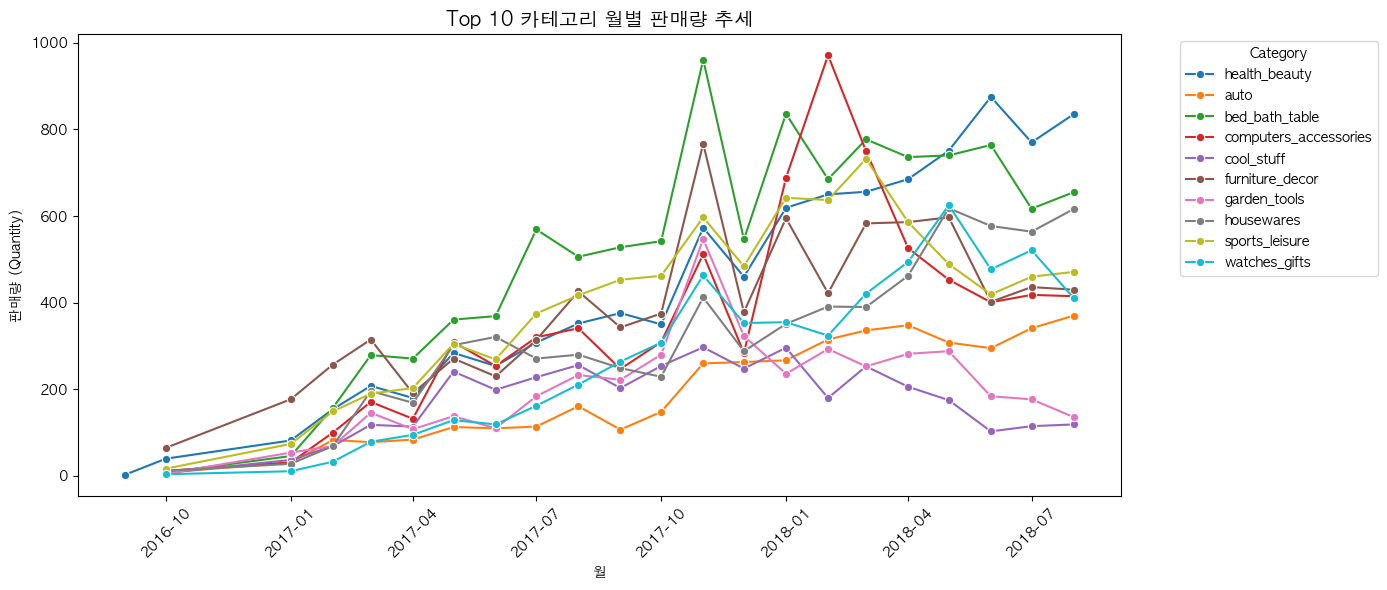

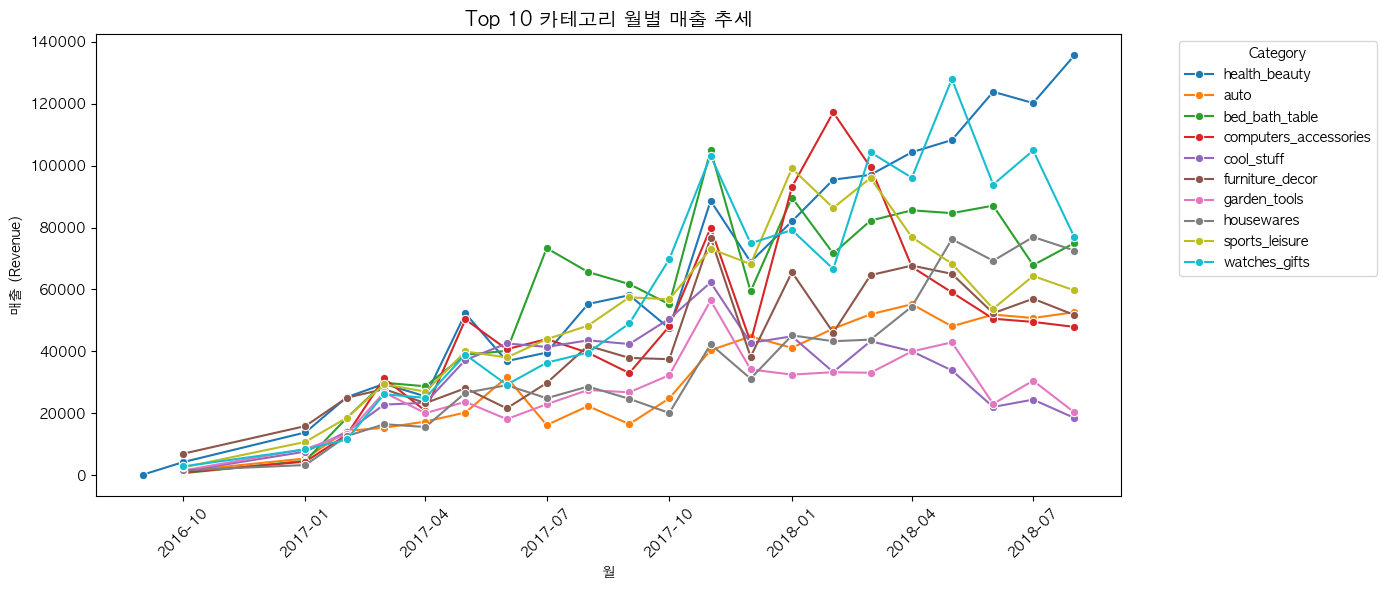

üìà ÏÑ±Ïû• Ïπ¥ÌÖåÍ≥†Î¶¨ TOP5: [('health_beauty', np.float64(6137.170959909656)), ('watches_gifts', np.float64(5373.5070649350655)), ('bed_bath_table', np.float64(3907.4770779220776)), ('housewares', np.float64(3512.6937792207796)), ('sports_leisure', np.float64(3380.236025974026))]
üìâ ÌïòÎùΩ Ïπ¥ÌÖåÍ≥†Î¶¨ TOP5: [('computers', np.float64(-1004.0134065934069)), ('market_place', np.float64(-60.94031168831169)), ('tablets_printing_image', np.float64(-58.95191176470589)), ('cds_dvds_musicals', np.float64(-30.05571428571428)), ('flowers', np.float64(-24.31416666666666))]


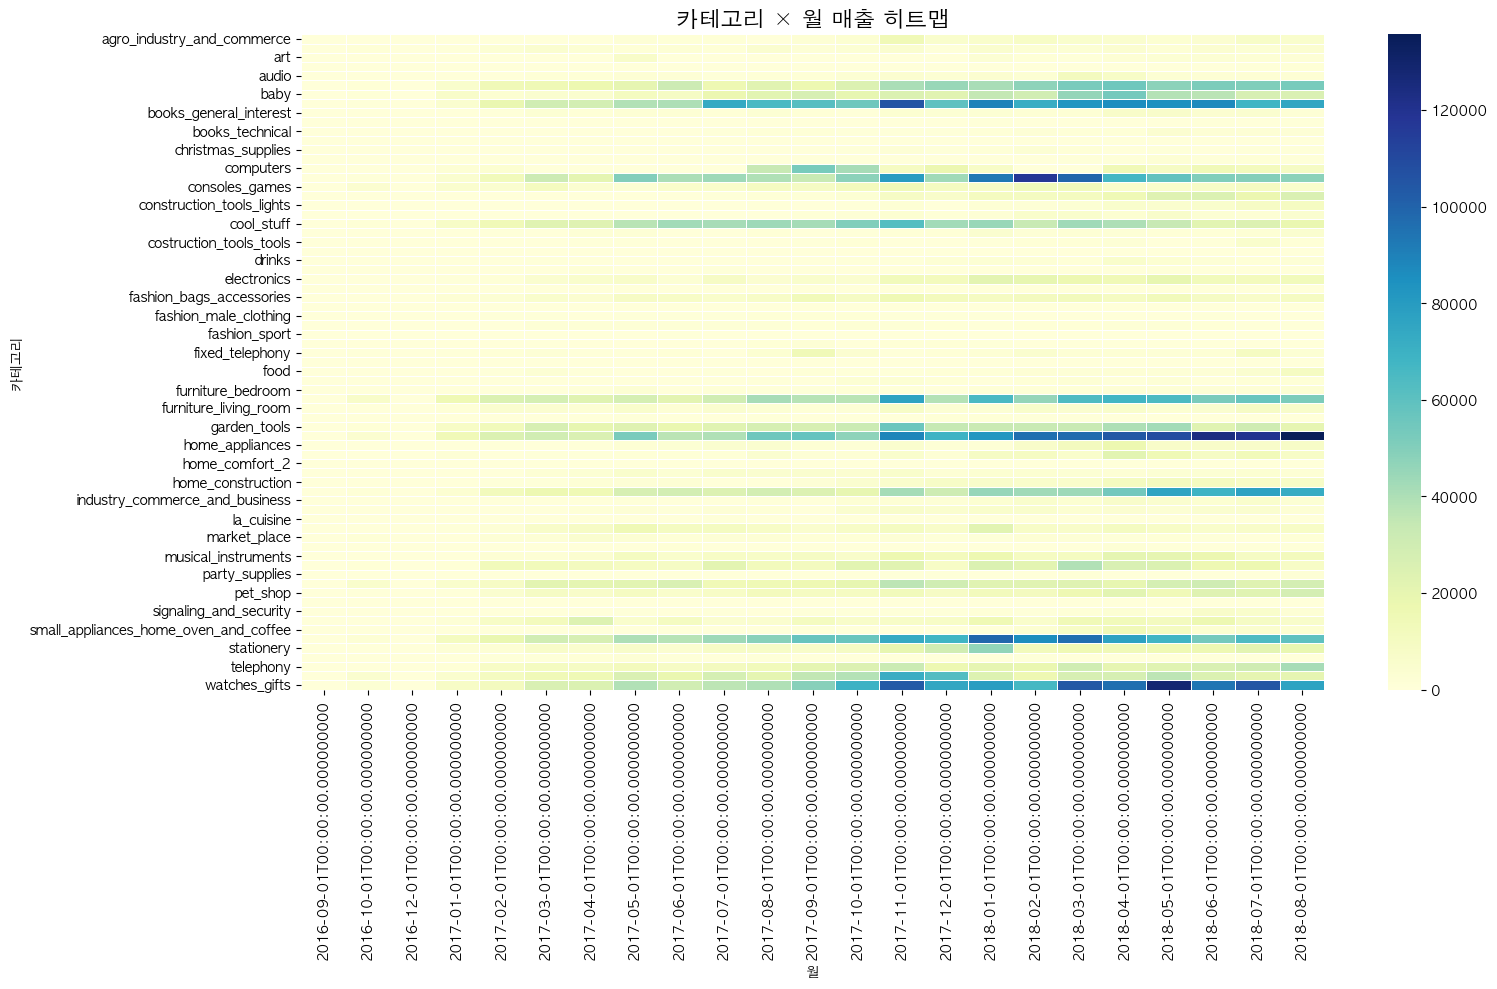

In [8]:
# ============================================
# Olist ‚Äì Í≥ºÏ†ú3 EDA Workflow (ÏµúÏ¢Ö Ï†ïÎ¶¨)
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from statsmodels.tsa.seasonal import seasonal_decompose

# ------------------------------------------------
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (CSV ‚Üí DataFrame)
# ------------------------------------------------
orders       = pd.read_csv("olist_orders_dataset.csv")
customers    = pd.read_csv("olist_customers_dataset.csv")
items        = pd.read_csv("olist_order_items_dataset.csv")
payments     = pd.read_csv("olist_order_payments_dataset.csv")
reviews      = pd.read_csv("olist_order_reviews_dataset.csv")
products     = pd.read_csv("olist_products_dataset.csv")
sellers      = pd.read_csv("olist_sellers_dataset.csv")
geolocation  = pd.read_csv("olist_geolocation_dataset.csv")
translation  = pd.read_csv("product_category_name_translation.csv")

print("‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")

# ------------------------------------------------
# 2. ÌíàÏßà Ï†êÍ≤Ä (Quality Check)
# ------------------------------------------------
print("\n[Í≤∞Ï∏°Ïπò ÌôïÏù∏]")
print(pd.DataFrame({
    'orders': orders.isna().sum(),
    'items': items.isna().sum(),
    'products': products.isna().sum(),
    'translation': translation.isna().sum()
}).fillna('-'))

print("\n[Ï§ëÎ≥µ Ïó¨Î∂Ä ÌôïÏù∏]")
print("orders Ï§ëÎ≥µ:", orders.duplicated().sum())
print("items Ï§ëÎ≥µ:", items.duplicated().sum())
print("products Ï§ëÎ≥µ:", products.duplicated().sum())

# ------------------------------------------------
# 3. Ï†ÑÏ≤òÎ¶¨
# ------------------------------------------------
# 3-1) ÎÇ†Ïßú ÌååÏã±
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# 3-2) Ï£ºÎ¨∏ ÏÉÅÌÉú deliveredÎßå ÎÇ®Í∏∞Í∏∞
orders = orders[orders['order_status'] == 'delivered']

# 3-3) products + translation merge (Ìè¨Î•¥Ìà¨Í∞àÏñ¥ ‚Üí ÏòÅÏñ¥ Ïπ¥ÌÖåÍ≥†Î¶¨)
products = products.merge(translation, on='product_category_name', how='left')

# 3-4) items + products merge (Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ôÏù¥Í∏∞)
order_items = items.merge(
    products[['product_id', 'product_category_name_english']],
    on='product_id', how='left'
)

# 3-5) ÏàòÏöî ÏÇ∞Ï∂ú
order_items['quantity'] = 1
order_items['revenue'] = order_items['price'] + order_items['freight_value']

print("\n‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å")

# ------------------------------------------------
# 4. ÏõîÎ≥Ñ¬∑Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ìå®ÎÑê ÏÉùÏÑ±
# ------------------------------------------------
panel = order_items.merge(
    orders[['order_id', 'order_month']],
    on='order_id', how='left'
)

monthly_category = (
    panel.groupby(['order_month', 'product_category_name_english'])
         .agg(quantity=('quantity','sum'),
              revenue=('revenue','sum'))
         .reset_index()
)

# order_monthÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
monthly_category['order_month'] = monthly_category['order_month'].dt.to_timestamp()

print("\n‚úÖ ÏõîÎ≥Ñ¬∑Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ìå®ÎÑê ÏÉùÏÑ± ÏôÑÎ£å")
print(monthly_category.head())

# ------------------------------------------------
# 5. ÌÉêÏÉâÏ†Å ÏãúÍ∞ÅÌôî (EDA)
# ------------------------------------------------
# Top-N Ïπ¥ÌÖåÍ≥†Î¶¨
top_n = 10
top_categories = (monthly_category.groupby('product_category_name_english')['revenue']
                  .sum()
                  .sort_values(ascending=False)
                  .head(top_n)
                  .index)

# ÌåêÎß§Îüâ ÎùºÏù∏ÌîåÎ°Ø
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_category[monthly_category['product_category_name_english'].isin(top_categories)],
             x='order_month', y='quantity', hue='product_category_name_english', marker="o")
plt.title(f"Top {top_n} Ïπ¥ÌÖåÍ≥†Î¶¨ ÏõîÎ≥Ñ ÌåêÎß§Îüâ Ï∂îÏÑ∏", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Ïõî")
plt.ylabel("ÌåêÎß§Îüâ (Quantity)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Îß§Ï∂ú ÎùºÏù∏ÌîåÎ°Ø
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_category[monthly_category['product_category_name_english'].isin(top_categories)],
             x='order_month', y='revenue', hue='product_category_name_english', marker="o")
plt.title(f"Top {top_n} Ïπ¥ÌÖåÍ≥†Î¶¨ ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏÑ∏", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Ïõî")
plt.ylabel("Îß§Ï∂ú (Revenue)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ÏÑ±Ïû•/ÌïòÎùΩ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏãùÎ≥Ñ
slopes = {}
for cat in monthly_category['product_category_name_english'].dropna().unique():
    df_cat = monthly_category[monthly_category['product_category_name_english']==cat].sort_values('order_month')
    if len(df_cat) >= 3:
        x = range(len(df_cat))
        y = df_cat['revenue'].values
        slope, _, _, _, _ = linregress(x, y)
        slopes[cat] = slope

growth_cats = sorted(slopes.items(), key=lambda x: x[1], reverse=True)[:5]
decline_cats = sorted(slopes.items(), key=lambda x: x[1])[:5]

print("üìà ÏÑ±Ïû• Ïπ¥ÌÖåÍ≥†Î¶¨ TOP5:", growth_cats)
print("üìâ ÌïòÎùΩ Ïπ¥ÌÖåÍ≥†Î¶¨ TOP5:", decline_cats)

# ÌûàÌä∏Îßµ
pivot_table = monthly_category.pivot_table(
    index='product_category_name_english',
    columns='order_month',
    values='revenue',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5)
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨ √ó Ïõî Îß§Ï∂ú ÌûàÌä∏Îßµ", fontsize=16)
plt.xlabel("Ïõî")
plt.ylabel("Ïπ¥ÌÖåÍ≥†Î¶¨")
plt.tight_layout()
plt.show()


Í¥ÄÏ∏°(Non-NaN) Í∞úÏàò: 21, Ï†ÑÏ≤¥ length (Ìè¨Ìï® Í≤∞Ï∏°): 23
Ï∂©Î∂ÑÌïú Ïó∞Í∞Ñ Ï£ºÍ∏∞ Í¥ÄÏ∏°Ïπò ÏóÜÏùå (ÌïÑÏöî: 24, ÌòÑÏû¨: 21). ÎåÄÏ≤¥ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
ÎåÄÏ≤¥ period = 10 Î°ú seasonal_decompose (additive) ÏãúÎèÑ (Ìï¥ÏÑù Ï£ºÏùò) ...


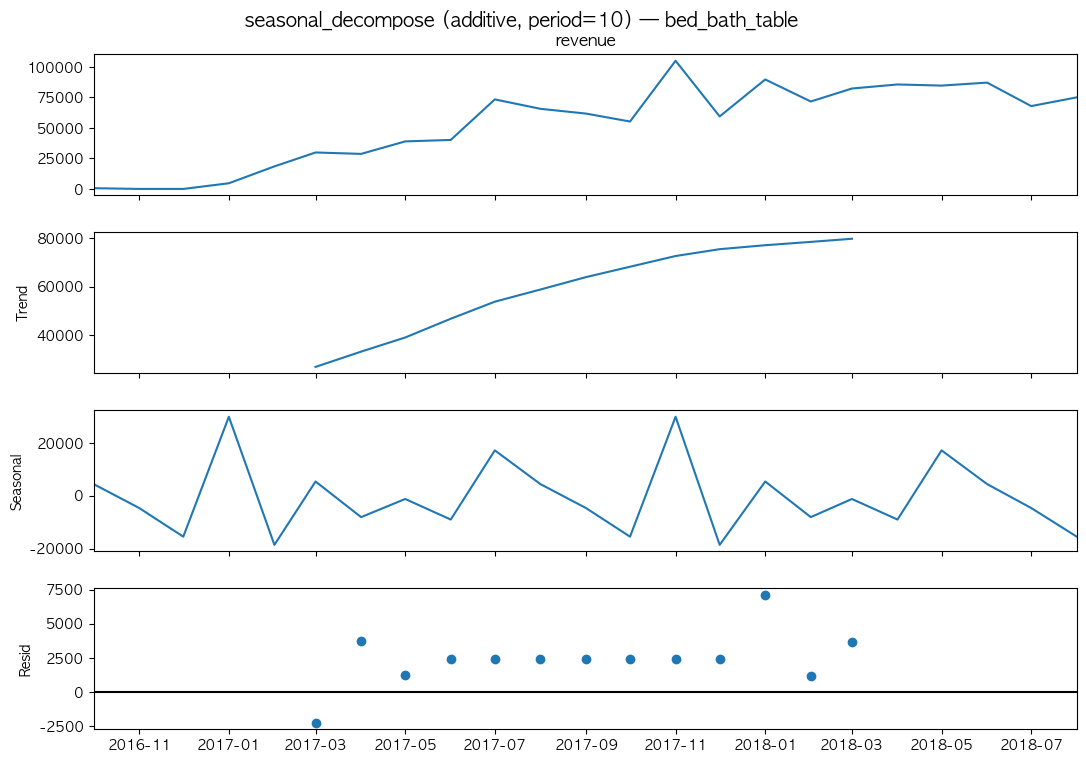

In [9]:
# ------------------------------------------------
# 6. Í≥ÑÏ†àÏÑ±/Ìå®ÌÑ¥ ÌÉêÏÉâ (ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ ÏòàÏãú)
# ------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Î∂ÑÏÑùÌï† Ïπ¥ÌÖåÍ≥†Î¶¨ ÏßÄÏ†ï
category = "bed_bath_table"

# monthly_category Í∞Ä Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï
# (Ïª¨ÎüºÎ™Ö: 'order_month' (datetime), 'product_category_name_english', 'revenue')
cat_df = monthly_category[monthly_category['product_category_name_english'] == category].copy()

# 1) ÏõîÎ≥ÑÎ°ú ÏßëÍ≥Ñ (ÏïàÏ†ÑÌïòÍ≤å)
cat_df = cat_df.groupby('order_month', as_index=False)['revenue'].sum()

# 2) Ïù∏Îç±Ïä§Î•º DatetimeÏúºÎ°ú ÎßåÎì§Í≥† Ïõî Îã®ÏúÑ freq ÏßÄÏ†ï
cat_df['order_month'] = pd.to_datetime(cat_df['order_month'])
ts = cat_df.set_index('order_month')['revenue'].asfreq('MS')  # Monthly Start frequency

# 3) Í¥ÄÏ∏°Ïπò Ïàò ÌôïÏù∏
n_obs_nonan = ts.dropna().shape[0]
n_total = len(ts)
print(f"Í¥ÄÏ∏°(Non-NaN) Í∞úÏàò: {n_obs_nonan}, Ï†ÑÏ≤¥ length (Ìè¨Ìï® Í≤∞Ï∏°): {n_total}")

# 4) Í∏∞Î≥∏ Ïó∞Í∞Ñ Ï£ºÍ∏∞
annual_period = 12

# 5) ÏãúÎèÑ Î°úÏßÅ
if n_obs_nonan >= 2 * annual_period:
    print("Ï∂©Î∂ÑÌïú Í¥ÄÏ∏°Ïπò(>=24) Î∞úÍ≤¨ ‚Äî seasonal_decompose(period=12, model='multiplicative') Ïã§Ìñâ")
    ts_use = ts.fillna(0.0)            # Í≤∞Ï∏°ÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í±∞ÎÇò Îã§Î•∏ Ï†ÑÎûµ Í∞ÄÎä•
    result = seasonal_decompose(ts_use, model='multiplicative', period=annual_period)
    fig = result.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f"seasonal_decompose (multiplicative) ‚Äî {category}", fontsize=14)
    plt.show()

else:
    print(f"Ï∂©Î∂ÑÌïú Ïó∞Í∞Ñ Ï£ºÍ∏∞ Í¥ÄÏ∏°Ïπò ÏóÜÏùå (ÌïÑÏöî: 24, ÌòÑÏû¨: {n_obs_nonan}). ÎåÄÏ≤¥ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    # ÎåÄÏ≤¥ 1: fallback_periodÎ•º Ïì∞Îäî seasonal_decompose (Ï£ºÏùò: Ìï¥ÏÑùÏóê Ïú†Ïùò)
    fallback_period = max(2, n_obs_nonan // 2)  # Ï†ÅÏñ¥ÎèÑ 2Î°ú ÏÑ§Ï†ï
    print(f"ÎåÄÏ≤¥ period = {fallback_period} Î°ú seasonal_decompose (additive) ÏãúÎèÑ (Ìï¥ÏÑù Ï£ºÏùò) ...")
    try:
        ts_use = ts.fillna(0.0)
        result = seasonal_decompose(ts_use, model='additive', period=fallback_period)
        fig = result.plot()
        fig.set_size_inches(12, 8)
        plt.suptitle(f"seasonal_decompose (additive, period={fallback_period}) ‚Äî {category}", fontsize=14)
        plt.show()
    except Exception as e:
        print("seasonal_decompose (fallback) Ïã§Ìå®:", e)
        print("ÎåÄÏã† STL Î∂ÑÌï¥Î•º ÏãúÎèÑÌï©ÎãàÎã§ (Îçî Ïú†Ïó∞).")
        try:
            # STL: Í≤∞Ï∏°ÏùÄ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏö∞Í≥† robust=True Î°ú Ïû°ÏùåÏóê Í∞ïÌïòÍ≤å Ìï®
            ts_stl = ts.fillna(ts.mean())
            # STLÏùò periodÎäî Î™®Îç∏ Î™©Ï†ÅÏóê ÎßûÍ≤å ÏÑ†ÌÉù. Ïó¨Í∏∞ÏÑúÎäî min(12, fallback_period) Í∂åÏû•
            stl_period = min(12, max(3, fallback_period))
            stl = STL(ts_stl, period=stl_period, robust=True)
            res = stl.fit()
            res.plot()
            plt.suptitle(f"STL decomposition (period={stl_period}) ‚Äî {category}", fontsize=14)
            plt.show()
        except Exception as e2:
            print("STL Î∂ÑÌï¥ÎèÑ Ïã§Ìå®ÌñàÏäµÎãàÎã§:", e2)
            print("ÎßàÏßÄÎßâÏúºÎ°ú Prophet ÎòêÎäî Îã§Î•∏ Î∞©Î≤ï(Î™®Îç∏ Í∏∞Î∞ò ÏòàÏ∏°)ÏùÑ Í∂åÏû•Ìï©ÎãàÎã§.")


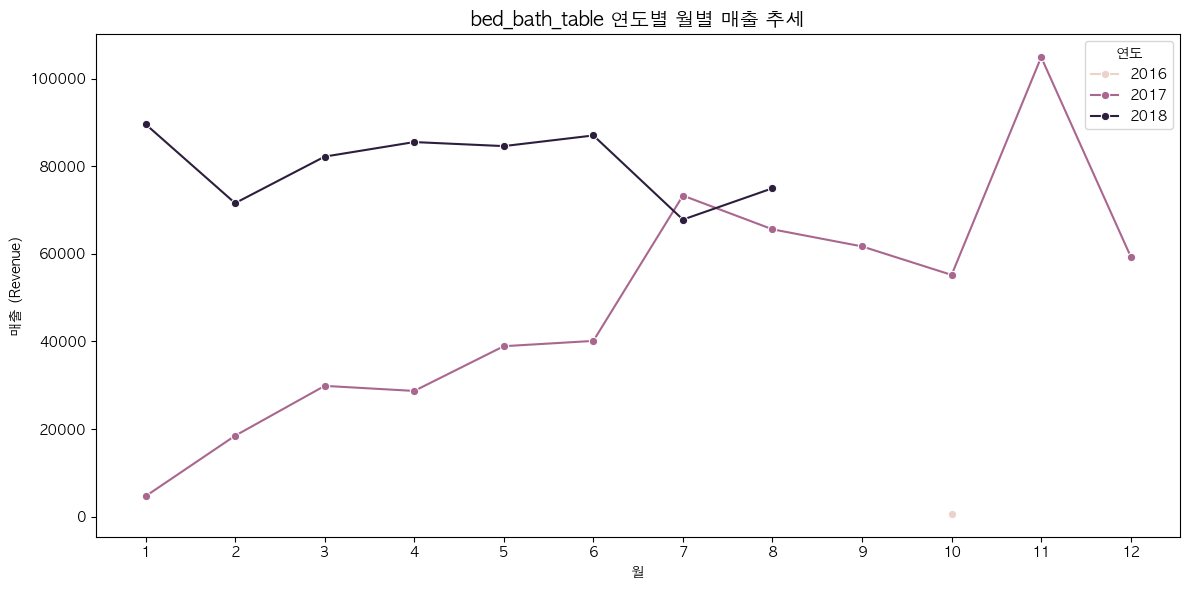

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# monthly_categoryÍ∞Ä Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï
# Ïª¨ÎüºÎ™Ö: 'order_month' (datetime), 'product_category_name_english', 'revenue'
category = "bed_bath_table"
cat_df = monthly_category[monthly_category['product_category_name_english'] == category].copy()

# Ïó∞ÎèÑÏôÄ Ïõî Ï∂îÏ∂ú
cat_df['year'] = cat_df['order_month'].dt.year
cat_df['month'] = cat_df['order_month'].dt.month

# Ïó∞ÎèÑÎ≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
cat_year_month = cat_df.groupby(['year', 'month'], as_index=False)['revenue'].sum()

# Ïó∞ÎèÑÎ≥Ñ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
sns.lineplot(data=cat_year_month, x='month', y='revenue', hue='year', marker='o')
plt.title(f"{category} Ïó∞ÎèÑÎ≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏÑ∏", fontsize=14)
plt.xlabel("Ïõî")
plt.ylabel("Îß§Ï∂ú (Revenue)")
plt.xticks(range(1,13))
plt.legend(title="Ïó∞ÎèÑ")
plt.tight_layout()
plt.show()

## ÏàòÏöî ÏòàÏ∏° 

1.	asfreq('MS') ‚Üí Ïõî Îã®ÏúÑ ÏãúÍ≥ÑÏó¥Î°ú Î≥ÄÌôò
2.	Train/Test Split ‚Üí ÎßàÏßÄÎßâ 12Í∞úÏõîÏùÑ TestÎ°ú ÏÇ¨Ïö©
3.	Seasonal Naive ‚Üí Ïù¥Ï†Ñ Ïó∞ÎèÑÏùò Í∞ôÏùÄ Îã¨ Îß§Ï∂ú Í∑∏ÎåÄÎ°ú ÏòàÏ∏°
4.	MAE Í≥ÑÏÇ∞ ‚Üí sklearn.metrics.mean_absolute_error
5.	ÏãúÍ∞ÅÌôî ‚Üí Train/Test/Forecast ÎπÑÍµê

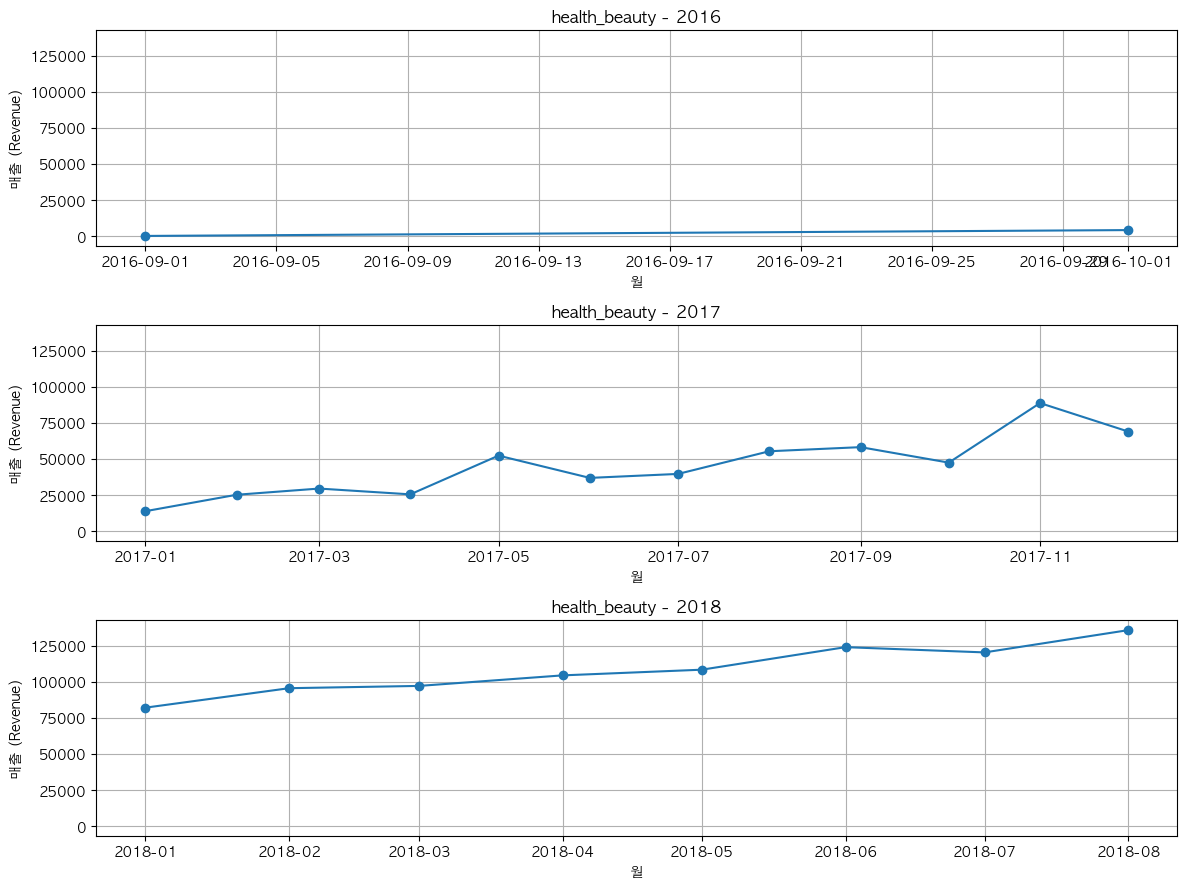

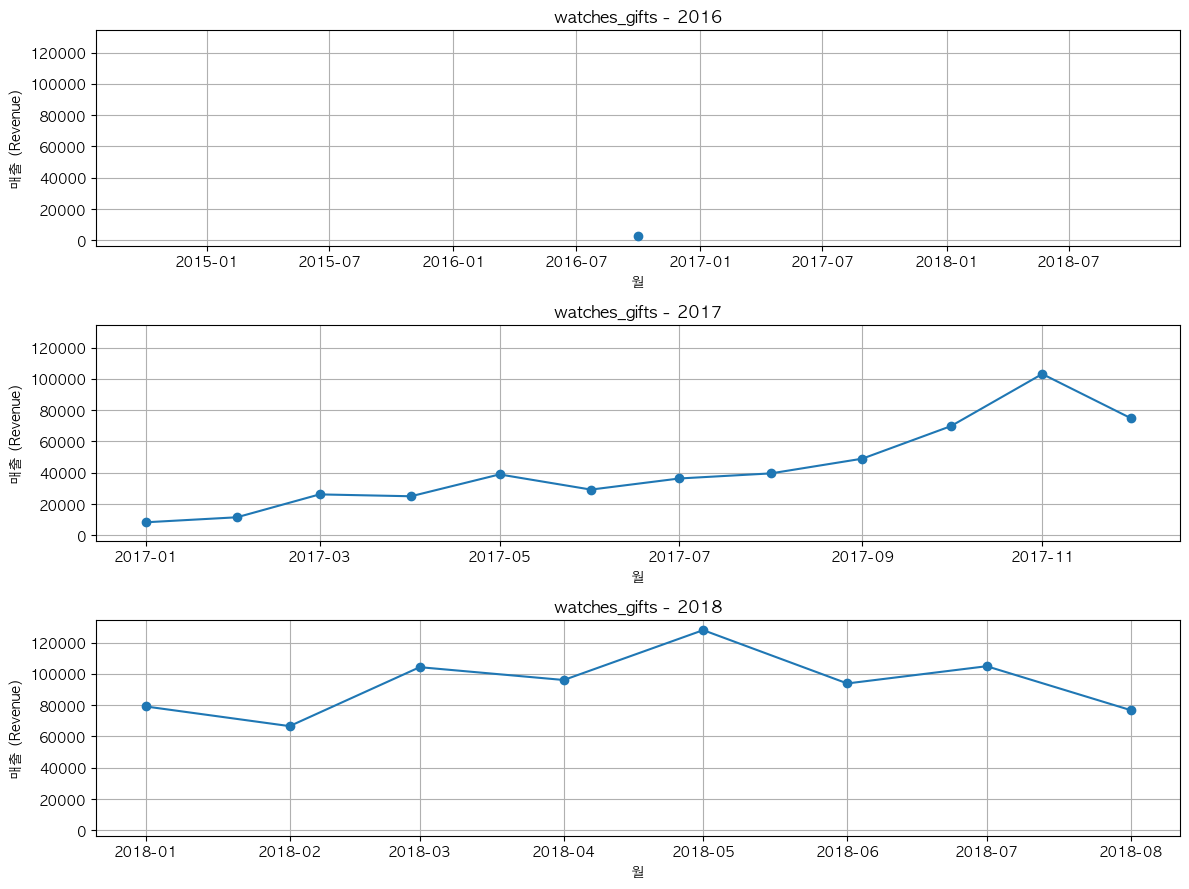

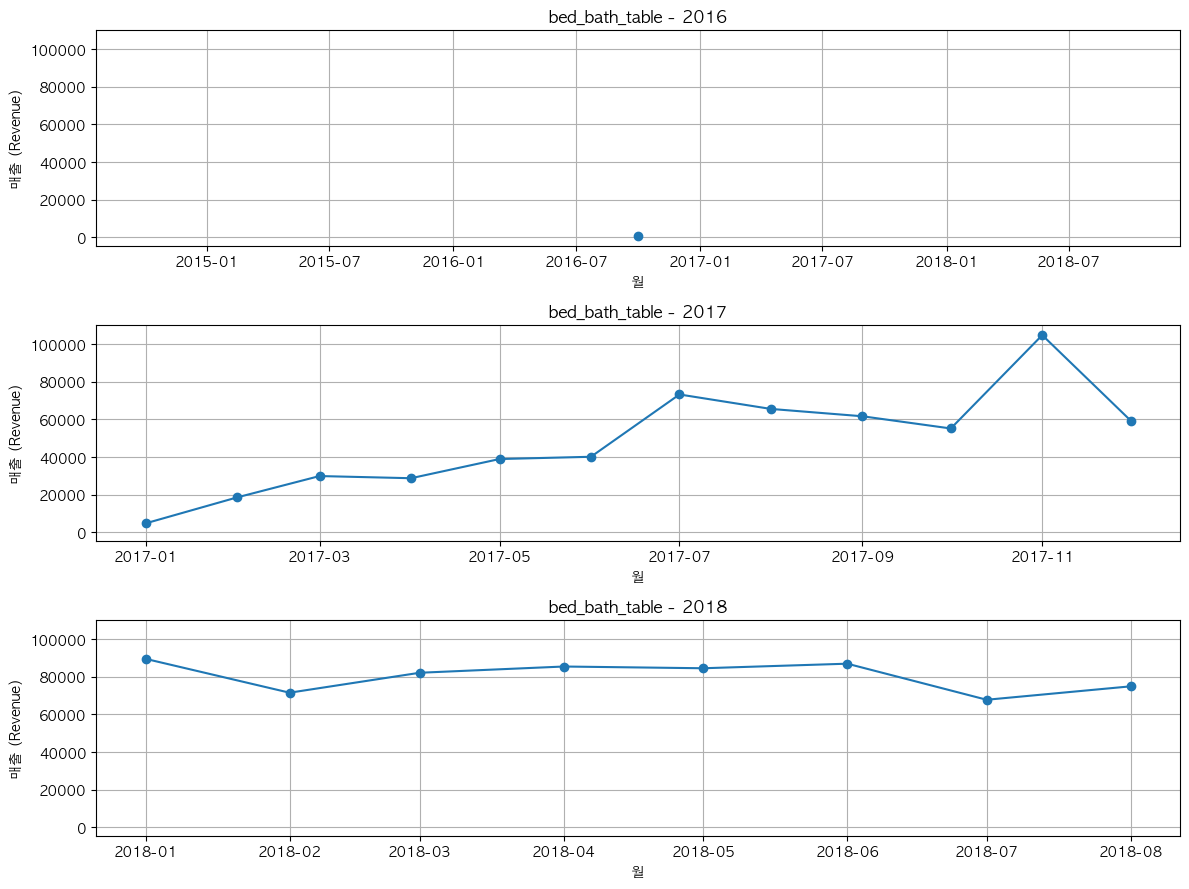

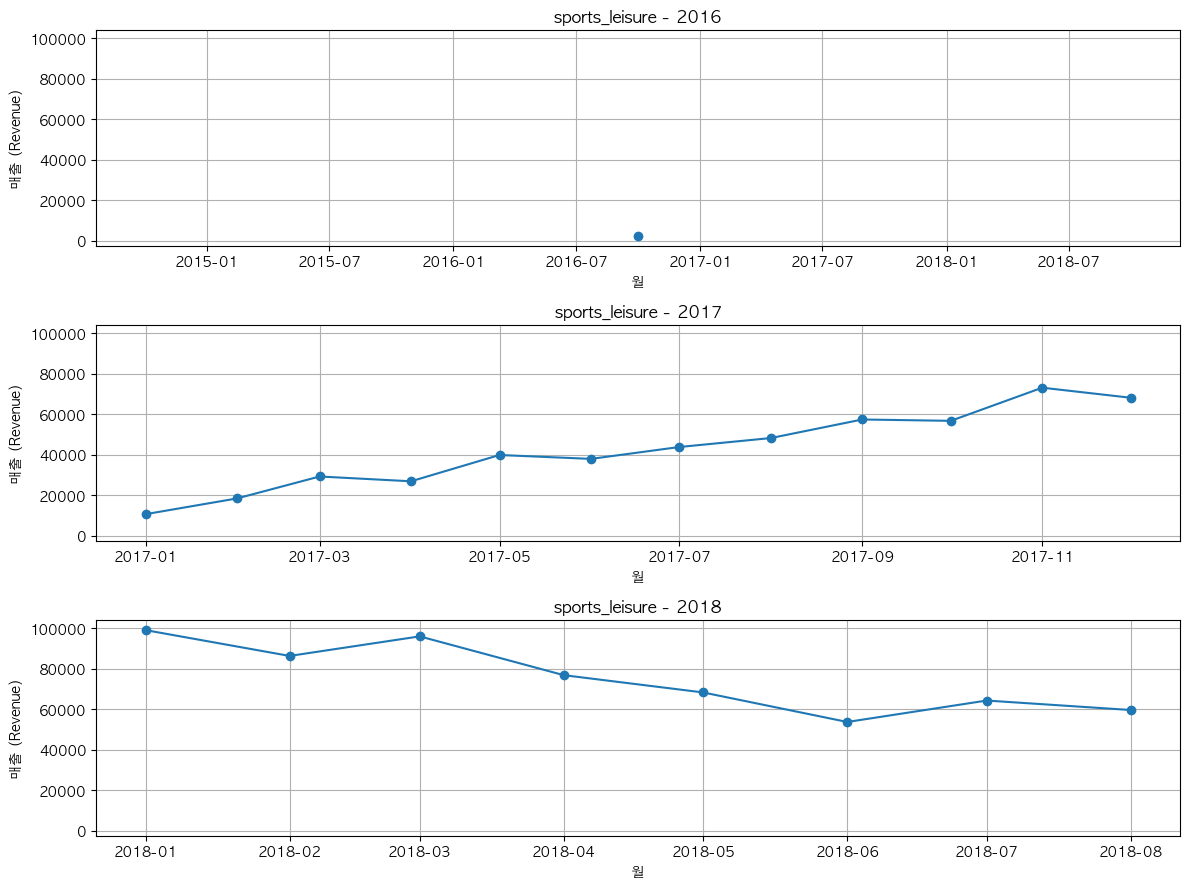

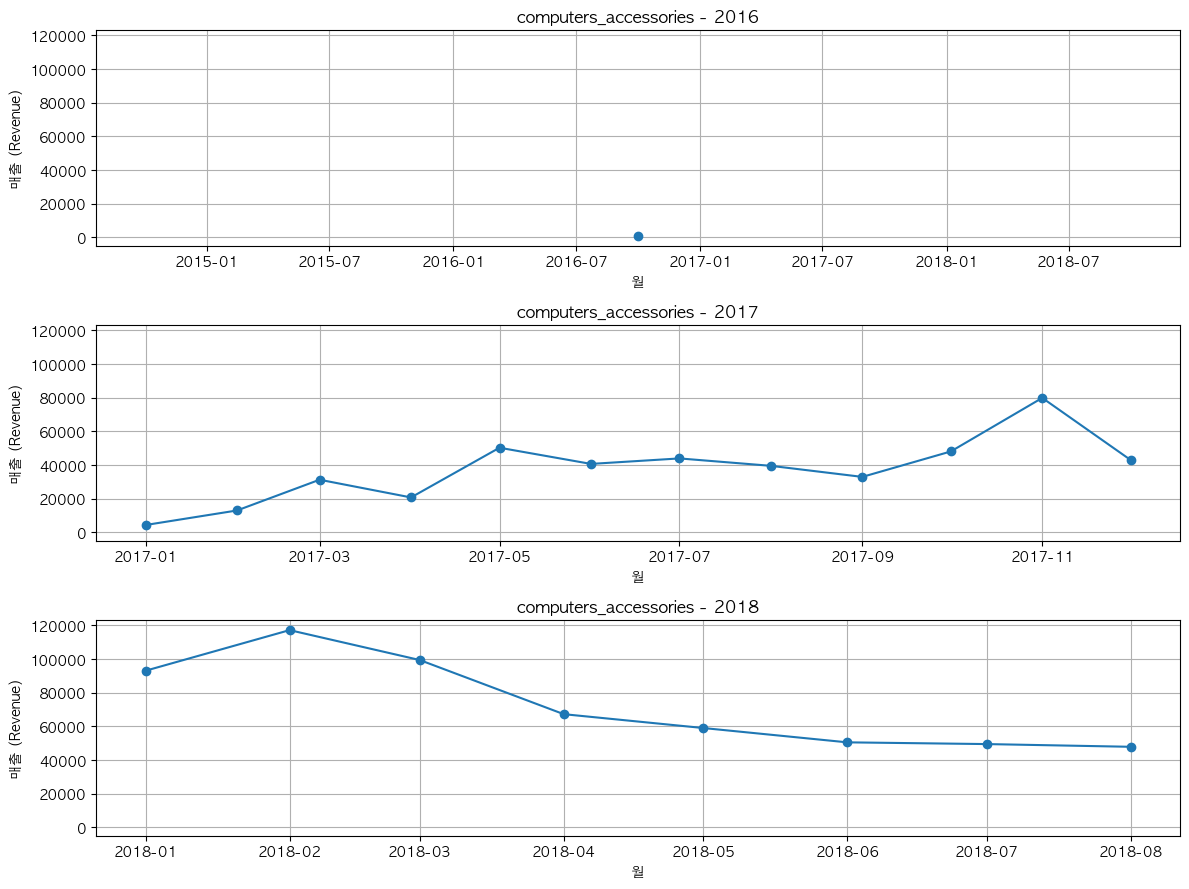

Top-N Ïπ¥ÌÖåÍ≥†Î¶¨ Seasonal Naive Forecast MAE ÏöîÏïΩ
                category           MAE
4  computers_accessories  41965.706667
3         sports_leisure  46117.621667
2         bed_bath_table  46584.960000
1          watches_gifts  65763.269167
0          health_beauty  70640.105833


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Top-N Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÑ†ÌÉù
top_n = 5
top_categories = (monthly_category.groupby('product_category_name_english')['revenue']
                  .sum()
                  .sort_values(ascending=False)
                  .head(top_n)
                  .index)

results = []

for category in top_categories:
    cat_df = monthly_category[monthly_category['product_category_name_english'] == category].copy()
    
    # ÏõîÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
    cat_monthly = cat_df.groupby('order_month', as_index=False)['revenue'].sum()
    cat_monthly.set_index('order_month', inplace=True)
    cat_monthly = cat_monthly.asfreq('MS')  # Monthly Start
    
    # Train / Test Split (ÎßàÏßÄÎßâ 12Í∞úÏõî test)
    train = cat_monthly.iloc[:-12]
    test  = cat_monthly.iloc[-12:]
    
    # Seasonal Naive Forecast
    seasonal_naive_forecast = train['revenue'][-12:].values if len(train) >= 12 else train['revenue'].values
    
    # Test Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ï°∞Ï†ï
    n = min(len(test), len(seasonal_naive_forecast))
    forecast = pd.Series(seasonal_naive_forecast[-n:], index=test.index[-n:])
    
    # Test / Forecast NaN Ï≤òÎ¶¨
    y_true = test['revenue'].fillna(0)
    y_pred = forecast.fillna(0)
    
    # Seasonal Naive Forecast
    if len(train) >= 12:
        seasonal_naive_forecast = train['revenue'][-12:].values
    else:
        seasonal_naive_forecast = train['revenue'].values

    # ÌÖåÏä§Ìä∏ Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ï°∞Ï†ï
    n = len(test)
    forecast = pd.Series(
        list(seasonal_naive_forecast[-n:]) + [seasonal_naive_forecast[-1]]*(n - len(seasonal_naive_forecast)),
        index=test.index
    )

    # NaN Ï†úÍ±∞ ÌõÑ MAE Í≥ÑÏÇ∞
    y_true = test['revenue'].fillna(0)
    y_pred = forecast.fillna(0)

    mae = mean_absolute_error(y_true, y_pred)
    results.append({'category': category, 'MAE': mae})
    
    # -----------------------------
    # Ïó∞ÎèÑÎ≥Ñ ÏãúÍ∞ÅÌôî
    # -----------------------------
    cat_monthly['year'] = cat_monthly.index.year
    years = cat_monthly['year'].unique()
    n_years = len(years)
    
    fig, axes = plt.subplots(n_years, 1, figsize=(12, 3*n_years), sharey=True)
    
    if n_years == 1:
        axes = [axes]  # 1ÎÖÑÏù¥Î©¥ listÎ°ú ÌÜµÏùº
    
    for ax, year in zip(axes, years):
        data = cat_monthly[cat_monthly['year'] == year]
        ax.plot(data.index, data['revenue'], marker='o', label=f'{year} Revenue')
        ax.set_title(f"{category} - {year}", fontsize=12)
        ax.set_xlabel("Ïõî")
        ax.set_ylabel("Îß§Ï∂ú (Revenue)")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Í≤∞Í≥º ÏöîÏïΩ
results_df = pd.DataFrame(results).sort_values('MAE')
print("Top-N Ïπ¥ÌÖåÍ≥†Î¶¨ Seasonal Naive Forecast MAE ÏöîÏïΩ")
print(results_df)

### Ïã§Ï†ú ÏàòÏöî, ÏòàÏ∏°, ÏïàÏ†ÑÏû¨Í≥† Î∞úÏ£ºÎüâ ÌôïÏù∏ 
1.	mean_demand / std_demand ‚Üí Í≥ºÍ±∞ 12Í∞úÏõî Í∏∞Ï§Ä ÏàòÏöî ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
2.	safety_stock ‚Üí ÏÑúÎπÑÏä§ ÏàòÏ§Ä(Z)Í≥º ÏàòÏöî Î≥ÄÎèôÏÑ±, Î¶¨ÎìúÌÉÄÏûÑ Î∞òÏòÅ
3.	forecast ‚Üí Seasonal Naive Forecast (ÏûëÎÖÑ Í∞ôÏùÄ Îã¨ ÏàòÏöî)
4.	recommended_order ‚Üí forecast + safety_stock
5.	Í∑∏ÎûòÌîÑ ‚Üí Ïã§Ï†ú ÏàòÏöî, ÏòàÏ∏°, ÏïàÏ†ÑÏû¨Í≥†, Î∞úÏ£ºÎüâ ÌïúÎààÏóê ÌôïÏù∏

/var/folders/98/vj3q9b254k79y681ng12dddh0000gn/T/ipykernel_55551/2514307645.py:62: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(monthly_category_panel['order_month']):


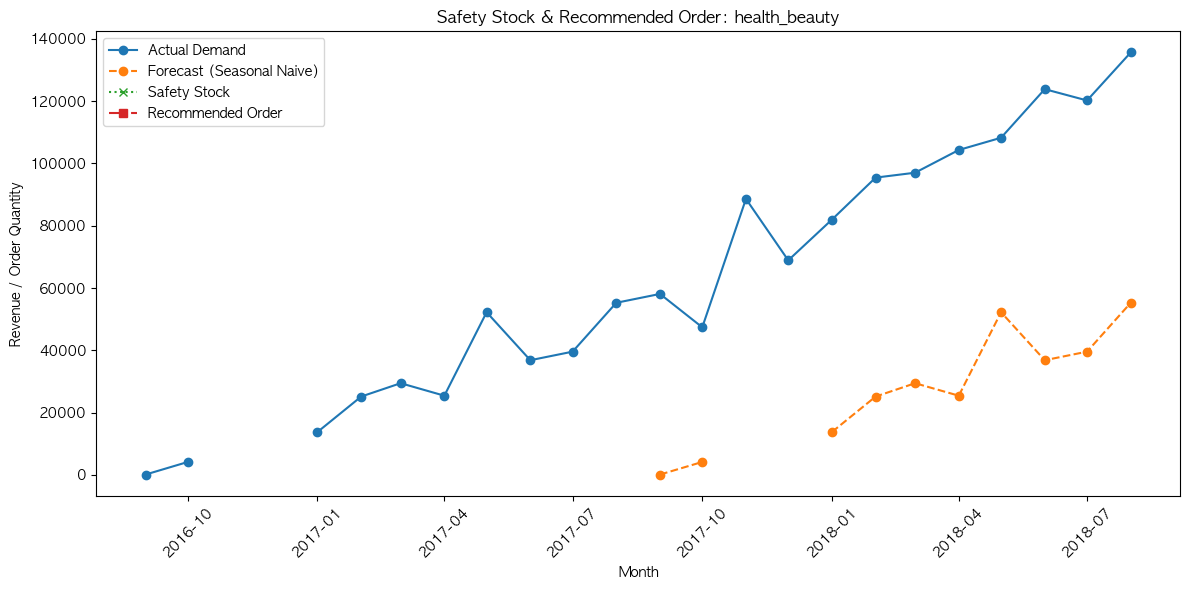

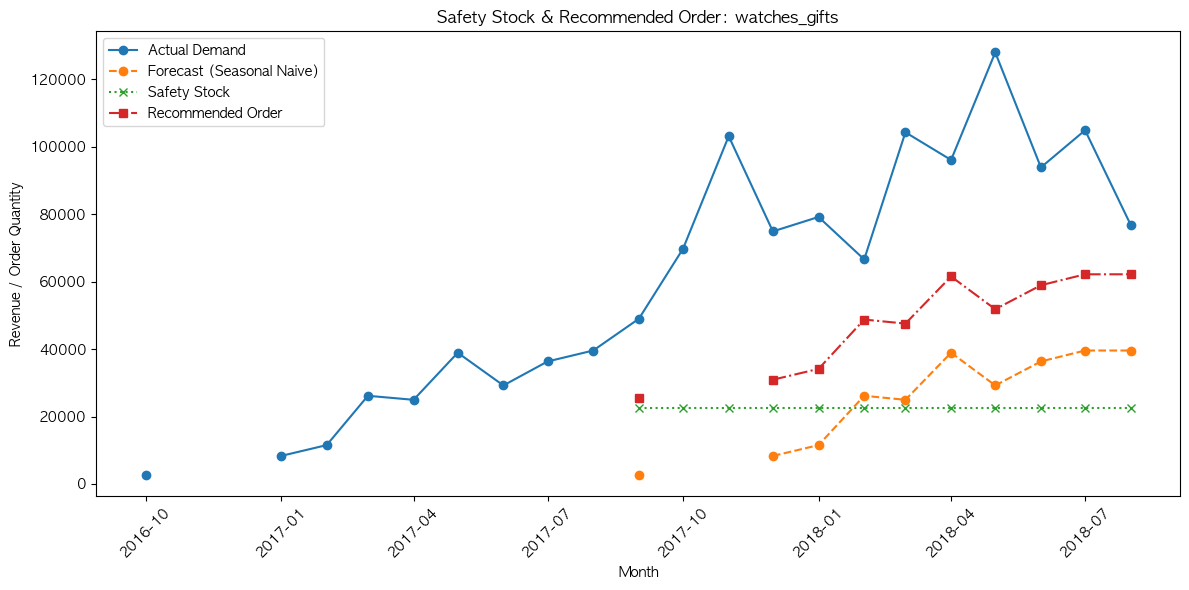

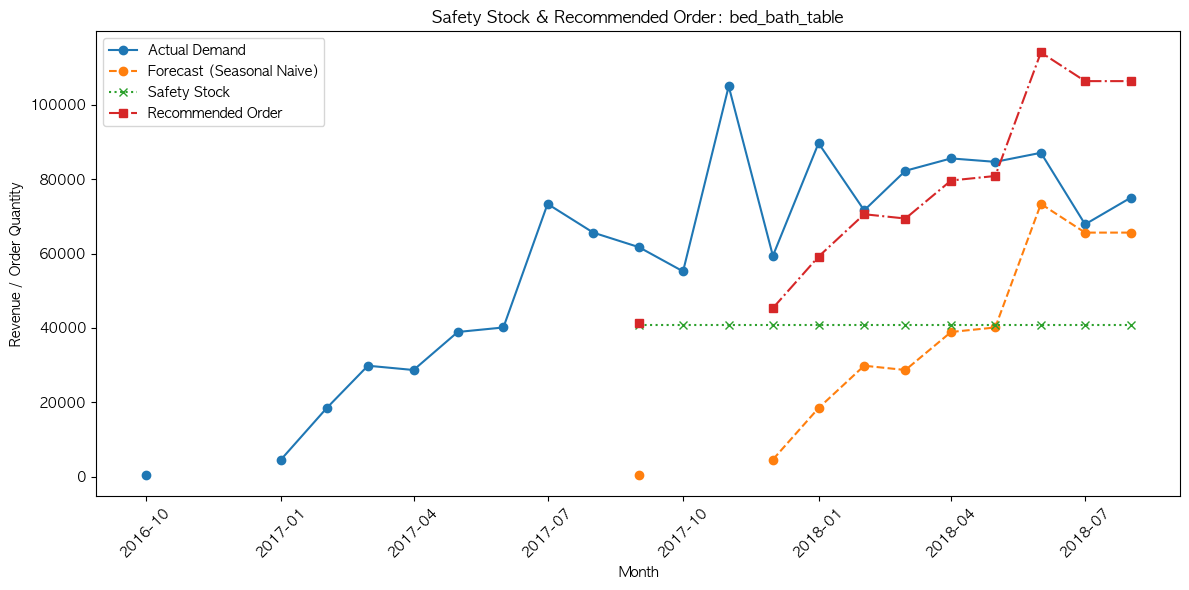

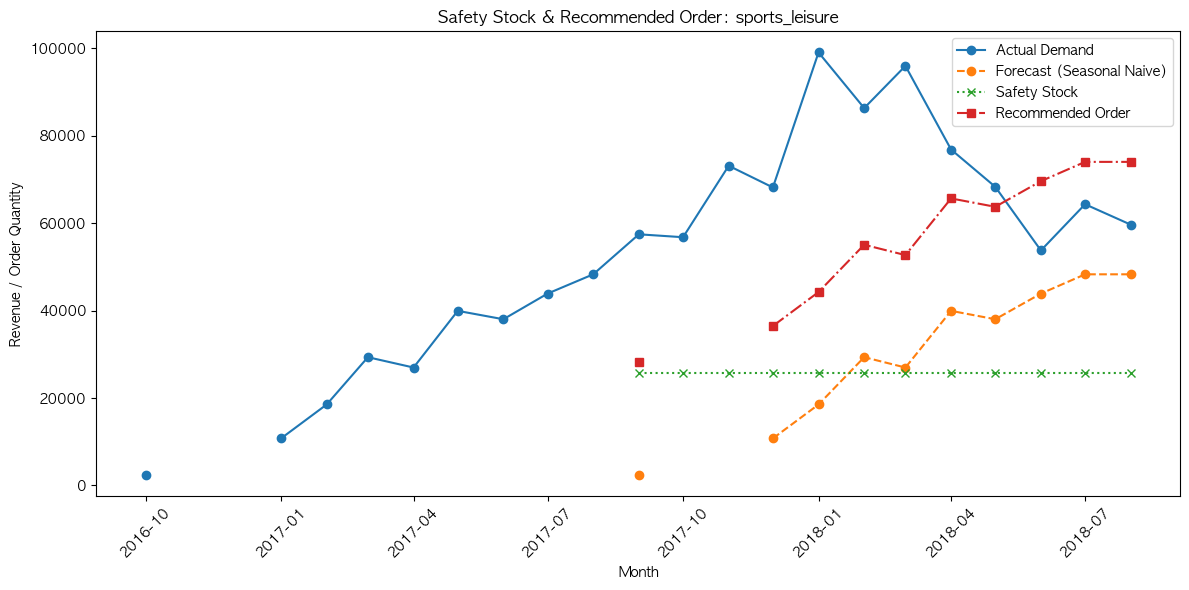

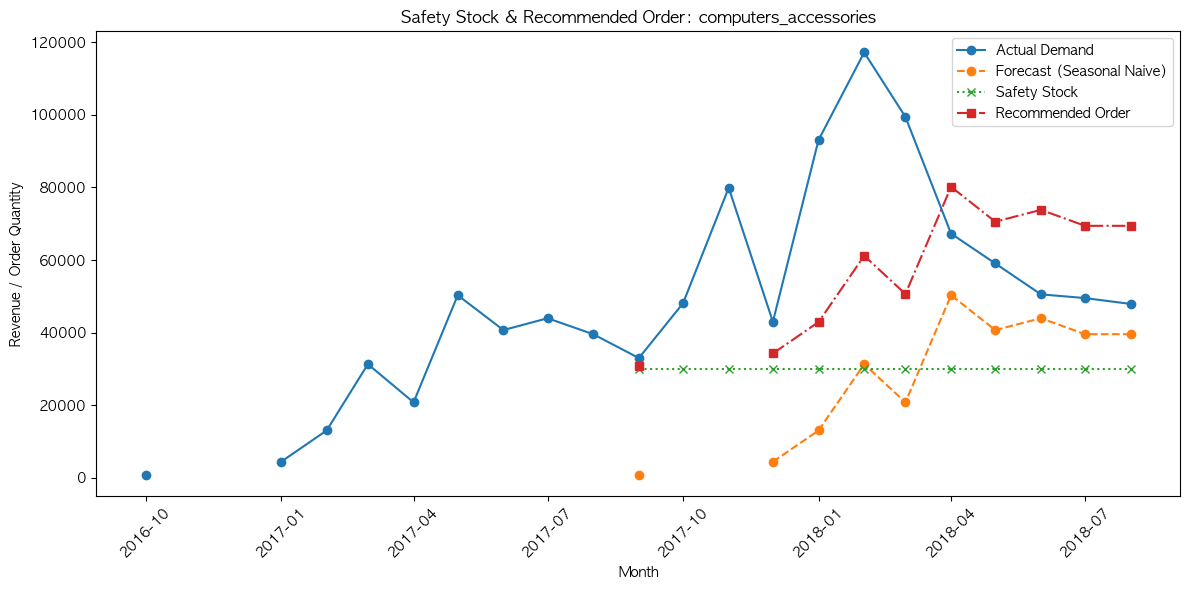

Top-N Ïπ¥ÌÖåÍ≥†Î¶¨ Seasonal Naive Forecast MAE ÏöîÏïΩ
                category           MAE
4  computers_accessories  41965.706667
3         sports_leisure  46117.621667
2         bed_bath_table  46584.960000
1          watches_gifts  65763.269167
0          health_beauty  70640.105833


In [12]:
# ============================================
# Olist ‚Äì EDA + Forecast + Safety Stock (ÏôÑÏ†Ñ ÏõåÌÅ¨ÌîåÎ°úÏö∞)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# ------------------------------------------------
# 1. CSV Î∂àÎü¨Ïò§Í∏∞
# ------------------------------------------------
orders       = pd.read_csv("olist_orders_dataset.csv")
items        = pd.read_csv("olist_order_items_dataset.csv")
products     = pd.read_csv("olist_products_dataset.csv")
category_map = pd.read_csv("product_category_name_translation.csv")

# ------------------------------------------------
# 2. Ï†ÑÏ≤òÎ¶¨
# ------------------------------------------------
# ÎÇ†Ïßú ÌååÏã±
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# delivered ÏÉÅÌÉúÎßå ÌïÑÌÑ∞ÎßÅ
orders = orders[orders['order_status'] == 'delivered']

# product_category_name_english ÏÉùÏÑ± (category_map ÌôúÏö©)
if 'product_category_name_english' not in products.columns:
    products = products.merge(category_map, on='product_category_name', how='left')

# ÏïàÏ†ÑÌïòÍ≤å Ïª¨ÎüºÎ™Ö ÌÜµÏùº
products.rename(columns={'product_category_name_english':'category_english'}, inplace=True)

# Ï£ºÎ¨∏ ÏïÑÏù¥ÌÖú + Ïπ¥ÌÖåÍ≥†Î¶¨ Í≤∞Ìï©
order_items = items.merge(
    products[['product_id', 'category_english']],
    on='product_id', how='left'
)

# ÏàòÏöî ÏÇ∞Ï∂ú
order_items['quantity'] = 1
order_items['revenue']  = order_items['price'] + order_items['freight_value']

# ------------------------------------------------
# 3. ÏõîÎ≥Ñ¬∑Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ìå®ÎÑê ÏÉùÏÑ±
# ------------------------------------------------
panel = order_items.merge(
    orders[['order_id','order_month']],
    on='order_id', how='left'
)

monthly_category_panel = (
    panel.groupby(['order_month','category_english'])
         .agg(quantity=('quantity','sum'),
              revenue=('revenue','sum'))
         .reset_index()
)

# order_month -> Timestamp
if pd.api.types.is_period_dtype(monthly_category_panel['order_month']):
    monthly_category_panel['order_month'] = monthly_category_panel['order_month'].dt.to_timestamp()

monthly_category_panel['category_english'] = monthly_category_panel['category_english'].fillna('Unknown')

# ------------------------------------------------
# 4. Top-N Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÑ†Ï†ï
# ------------------------------------------------
top_n = 5
top_categories = (monthly_category_panel.groupby('category_english')['revenue']
                  .sum()
                  .sort_values(ascending=False)
                  .head(top_n)
                  .index)

# ------------------------------------------------
# 5. Forecast + ÏïàÏ†ÑÏû¨Í≥† + Ï∂îÏ≤ú Î∞úÏ£ºÎüâ ÏãúÍ∞ÅÌôî
# ------------------------------------------------
results = []

for category in top_categories:
    cat_df = monthly_category_panel[monthly_category_panel['category_english']==category].copy()
    cat_df = cat_df.groupby('order_month', as_index=False)['revenue'].sum()
    cat_df.set_index('order_month', inplace=True)
    cat_df = cat_df.asfreq('MS')  # Monthly Start
    
    # Train/Test Split (ÎßàÏßÄÎßâ 12Í∞úÏõî)
    train = cat_df.iloc[:-12]
    test  = cat_df.iloc[-12:]
    
    # Seasonal Naive Forecast
    if len(train) >= 12:
        seasonal_naive_forecast = train['revenue'][-12:].values
    else:
        seasonal_naive_forecast = train['revenue'].values
    
    # Test Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ï°∞Ï†ï
   
    # Test Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ï°∞Ï†ï
    n = min(len(test), len(seasonal_naive_forecast))
    forecast = pd.Series(seasonal_naive_forecast[-n:], index=test.index[-n:])
    
    # Test / Forecast NaN Ï≤òÎ¶¨
    y_true = test['revenue'].fillna(0)
    y_pred = forecast.fillna(0)
    
    # Seasonal Naive Forecast
    if len(train) >= 12:
        seasonal_naive_forecast = train['revenue'][-12:].values
    else:
        seasonal_naive_forecast = train['revenue'].values

    # ÌÖåÏä§Ìä∏ Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ï°∞Ï†ï
    n = len(test)
    forecast = pd.Series(
        list(seasonal_naive_forecast[-n:]) + [seasonal_naive_forecast[-1]]*(n - len(seasonal_naive_forecast)),
        index=test.index
    )
    
    # NaN Ï≤òÎ¶¨
    y_true = test['revenue'].fillna(0)
    y_pred = forecast.fillna(0)
    
    # MAE Í≥ÑÏÇ∞
    mae = mean_absolute_error(y_true, y_pred)
    results.append({'category': category, 'MAE': mae})
    
    # ÏïàÏ†ÑÏû¨Í≥† Í≥ÑÏÇ∞ (ÏµúÍ∑º 12Í∞úÏõî std * 1.65)
    if len(train) >= 12:
        safety_stock_val = train['revenue'].rolling(12).std().iloc[-1]*1.65
    else:
        safety_stock_val = train['revenue'].std()*1.65
    safety_stock = pd.Series(safety_stock_val, index=test.index)
    
    # Ï∂îÏ≤ú Î∞úÏ£ºÎüâ = forecast + safety_stock
    recommended_order = forecast + safety_stock
    
    # DatetimeIndex ÌôïÏù∏
    cat_df.index = pd.to_datetime(cat_df.index)
    forecast.index = pd.to_datetime(forecast.index)
    safety_stock.index = pd.to_datetime(safety_stock.index)
    recommended_order.index = pd.to_datetime(recommended_order.index)
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12,6))
    plt.plot(cat_df.index, cat_df['revenue'], label='Actual Demand', marker='o')
    plt.plot(forecast.index, forecast, label='Forecast (Seasonal Naive)', marker='o', linestyle='--')
    plt.plot(safety_stock.index, safety_stock, label='Safety Stock', marker='x', linestyle=':')
    plt.plot(recommended_order.index, recommended_order, label='Recommended Order', marker='s', linestyle='-.')
    plt.title(f"Safety Stock & Recommended Order: {category}")
    plt.xlabel("Month")
    plt.ylabel("Revenue / Order Quantity")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------
# 6. Í≤∞Í≥º ÏöîÏïΩ
# ------------------------------------------------
results_df = pd.DataFrame(results).sort_values('MAE')
print("Top-N Ïπ¥ÌÖåÍ≥†Î¶¨ Seasonal Naive Forecast MAE ÏöîÏïΩ")
print(results_df)